<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_mod4_hw1_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# возьмем данные продаж, как наиболее наглядные для дз

In [5]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

# построим график

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
}

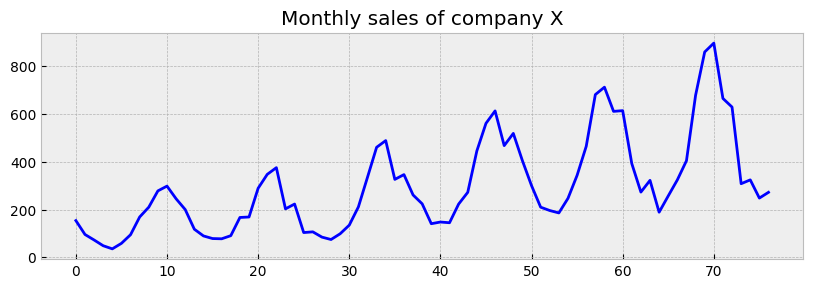

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

# оцениваем сезонность

In [9]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

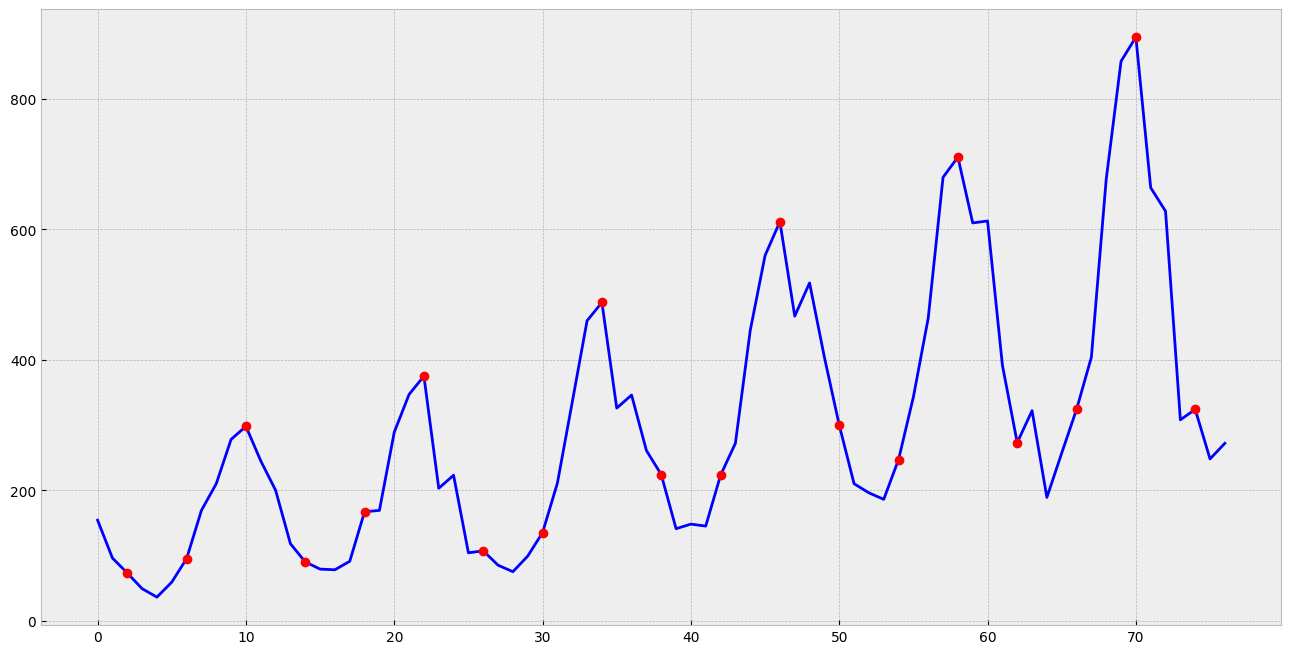

In [10]:
plot_ts_and_points(sales_of_company_x['Count'], 2, 4)

# Нормализуем дисперсию

In [11]:
from scipy.stats import boxcox

In [14]:
series = boxcox(all_series["Monthly sales of company X"], 0)

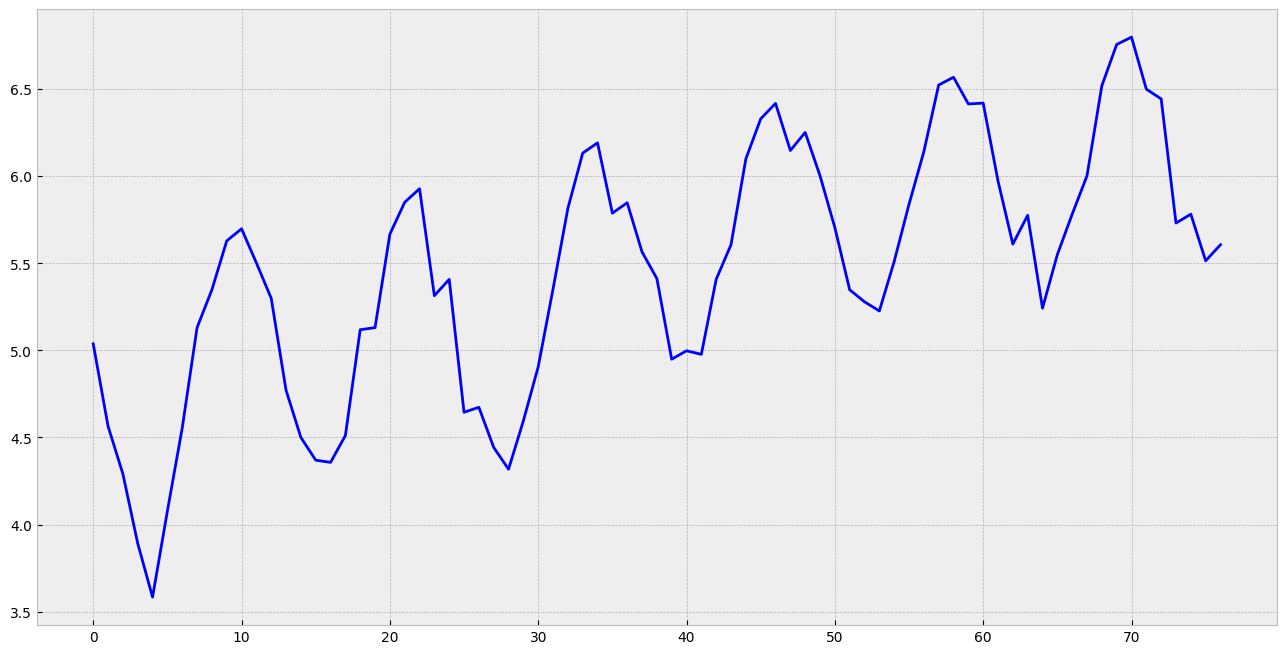

In [15]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# дифференцируем - для получения станционарного ряда

In [16]:
import numpy as np

In [17]:
series = np.diff(series, 1)

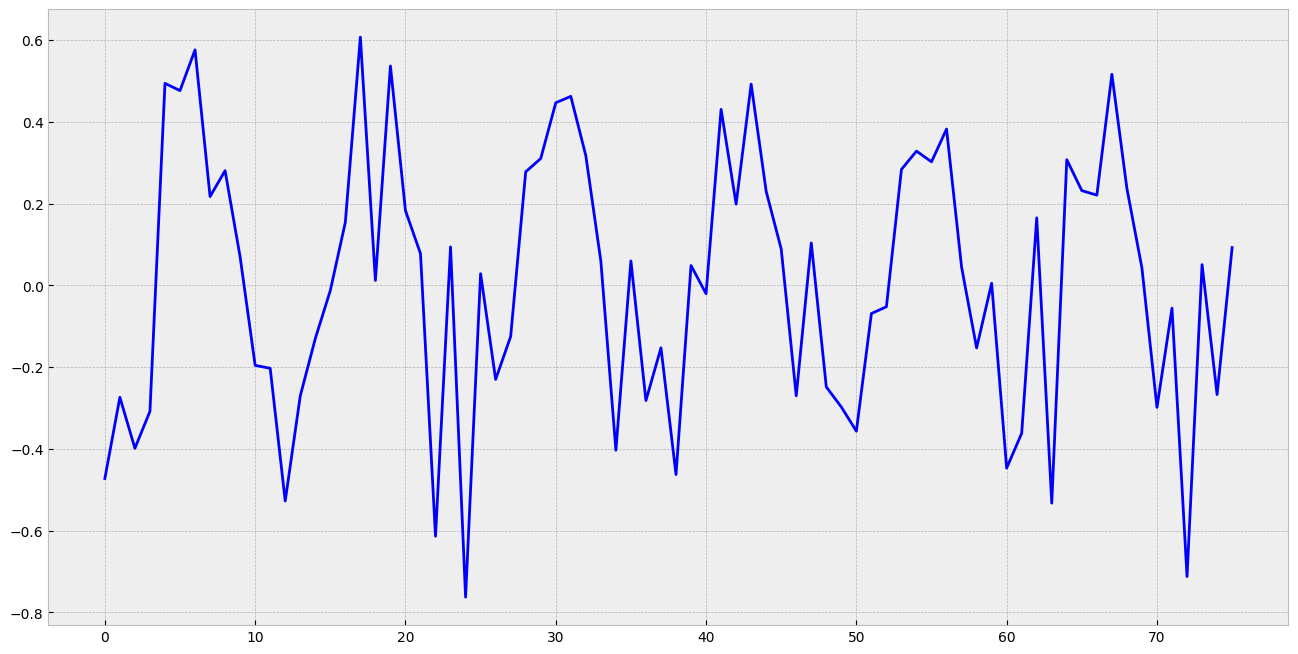

In [18]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')